In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import nltk.corpus
import markovify

### Useful Resources

1. https://pudding.cool/2017/08/the-office/
2. https://simpletexting.com/the-office-dialogue-analysis/
3. https://www.jennadallen.com/post/text-analytics-every-line-from-the-office/

In [107]:
df = pd.read_csv("The_Office_lines.csv", index_col='id')
df.drop(['scene'], axis = 1, inplace=True)
df.rename({'line_text': 'line'}, axis=1, inplace=True)
df.head()

,season,episode,line,speaker,deleted
id,,,,,
1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
2,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
3,1,1,So you've come to the master for guidance? Is ...,Michael,False
4,1,1,"Actually, you called me in here, but yeah.",Jim,False
5,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [108]:
pd.set_option("display.max_rows", None)
lines_spoken = df.speaker.value_counts()[:20]
lines_spoken

Michael     12145
Dwight       7532
Jim          6814
Pam          5375
Andy         3969
Kevin        1709
Angela       1695
Oscar        1491
Erin         1469
Ryan         1379
Darryl       1281
Phyllis      1071
Kelly         956
Jan           949
Toby          936
Stanley       761
Meredith      645
Holly         609
Nellie        529
Creed         456
Name: speaker, dtype: int64

In [109]:
fig = px.bar(lines_spoken, title='Lines spoken by popular characters', 
            labels=dict(index = "Speaker", value = "Dialogues spoken", variable=""))
fig.show()

In [110]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [111]:
with open('most_common_english_words.txt', 'r') as file:
    most_common = [i.strip('\n') for i in file.readlines()]

In [112]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [113]:
def speaker_wordcloud(speaker):
    speaker_lines = df.loc[df['speaker'] == speaker, 'line']
    speaker_words = []
    for line in speaker_lines:
        words = tokenizer.tokenize(line)
        speaker_words.extend(words)

    speaker_words = [word.lower() for word in speaker_words]
    speaker_words = list(filter(lambda x: x not in most_common, speaker_words))
    speaker_words = list(filter(lambda x: x not in stopwords, speaker_words))
    speaker_words = list(filter(lambda x: len(x) > 2, speaker_words))
    
    #convert it to dictionary with values and its occurences
    word_could_dict = Counter(speaker_words)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

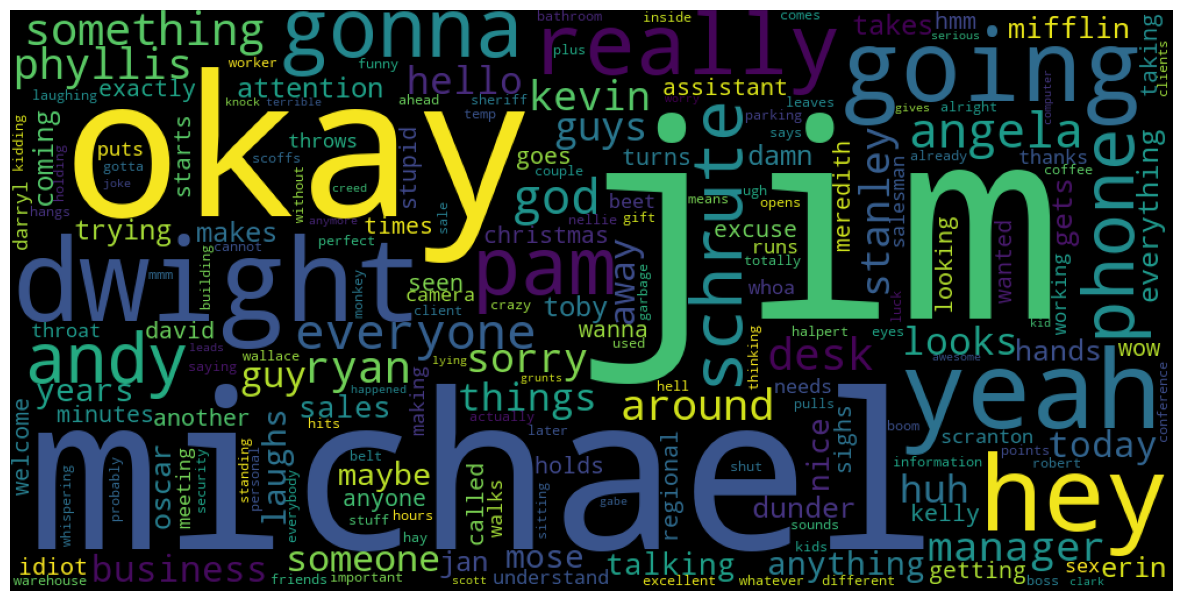

In [114]:
speaker_wordcloud('Dwight')

In [115]:
df.tail()

,season,episode,line,speaker,deleted
id,,,,,
59905,9,23,It all seems so very arbitrary. I applied for ...,Creed,False
59906,9,23,I just feel lucky that I got a chance to share...,Meredith,False
59907,9,23,I'm happy that this was all filmed so I can re...,Phyllis,False
59908,9,23,I sold paper at this company for 12 years. My ...,Jim,False
59909,9,23,I thought it was weird when you picked us to m...,Pam,False


In [116]:
speaker_lines = df.loc[df['speaker'] == "Angela", 'line']
print(speaker_lines)

id
68           I bet it's gonna be me. Probably gonna be me.
246      My name is Angela and um, I'm in charge of the...
248      Oscar, how do I describe him. He's like a stap...
251      Not very worried about downsizing right now. B...
253      I have a lot of cat figurines on my desk. I th...
446                                                   Hey.
448                                                  Sure.
450                                                    No.
452                                                Stop...
657                           Kevin! That's inappropriate.
673                  It's ridiculous. Did you talk to him?
675      You let him walk all over you. It's just pathe...
677                                        Nothing, Kevin.
804                               What about the surprise?
921                                                  What?
923                  No, yeah, I think that's a good idea.
925                          What color do you guys t

In [117]:
# def speaker_lines(speaker):
#     speaker_lines = df.loc[df['speaker'] == speaker, 'line']
#     with open(f"./character_lines/{speaker}_lines.txt", "w", encoding="utf-8") as file:
#         for line in speaker_lines:
#             file.writelines(line + '\n')

In [118]:
speakers = lines_spoken.index.tolist()
speakers

['Michael',
 'Dwight',
 'Jim',
 'Pam',
 'Andy',
 'Kevin',
 'Angela',
 'Oscar',
 'Erin',
 'Ryan',
 'Darryl',
 'Phyllis',
 'Kelly',
 'Jan',
 'Toby',
 'Stanley',
 'Meredith',
 'Holly',
 'Nellie',
 'Creed']

In [119]:
# for i in speakers:
#     speaker_lines(i)

In [120]:
def dialogue_generator(speaker, n):
    # Get raw text as string.
    with open(f"./character_lines/{speaker}_lines.txt", "r") as f:
        text = f.read()

    # Build the model.
    markov_model = markovify.NewlineText(text)
    
    for i in range(n):
        print(markov_model.make_short_sentence(110))

In [121]:
dialogue_generator("Michael", 5)

Yeah, I went hunting once. Shot the deer in the end. When people work together, there is a beaut!
Yeah. I'm sorry. God.
Why on earth would we come up with this novelty check, for six hours. Do my time.
Uh... you know that it is a perfectly good carpet? I don't think you are happy.
Enabler! Enabler, enabler, enabler, enabler. It's Christmas and we love it.
